In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()

In [ ]:
# Strip any spaces in column names
df.columns = df.columns.str.strip()

In [3]:
# missing values
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [ ]:
#the column names in the dataset
print(df.columns)

In [15]:
# Create a crosstab between product category and isBestSeller status
category_bestseller_crosstab = pd.crosstab(df['category'], df['isBestSeller'])
print(category_bestseller_crosstab)


isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [21]:
# Calculate the proportion of best-sellers for each category
category_bestseller_crosstab['Proportion_BestSeller'] = category_bestseller_crosstab[True] / category_bestseller_crosstab.sum(axis=1)

# Sort categories based on the proportion of best-sellers in descending order
category_bestseller_sorted = category_bestseller_crosstab.sort_values(by='Proportion_BestSeller', ascending=False)

# Display the result
print(category_bestseller_sorted[['Proportion_BestSeller']])


isBestSeller                      Proportion_BestSeller
category                                               
Grocery                                        0.058134
Health & Personal Care                         0.057686
Smart Home Security & Lighting                 0.057660
Mobile Phone Accessories                       0.042464
Power & Hand Tools                             0.035339
...                                                 ...
CD, Disc & Tape Players                        0.000000
General Music-Making Accessories               0.000000
Snowboard Boots                                0.000000
Boxes & Organisers                             0.000000
eBook Readers & Accessories                    0.000000

[296 rows x 1 columns]


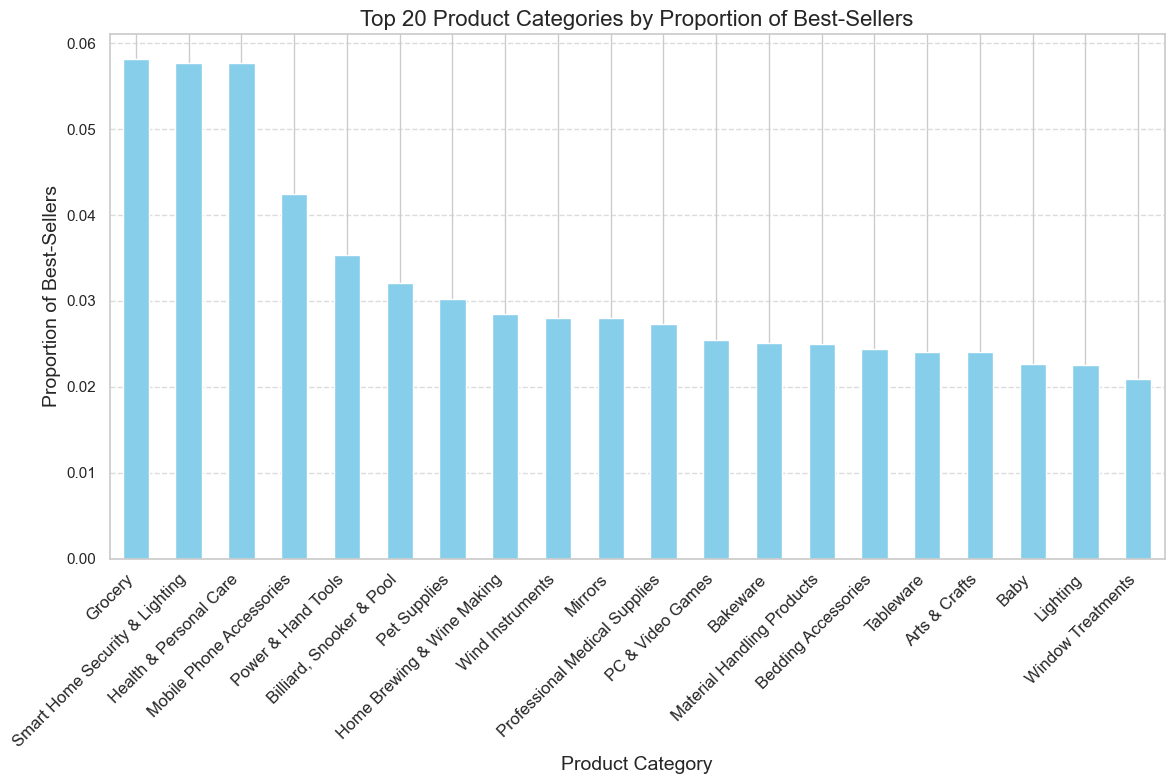

In [43]:
# Set the Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Focus on top N categories by proportion of best-sellers
top_n = 20  # Adjustiment to show top n categories
top_categories = category_bestseller_sorted.head(top_n)

# Creating bar plot of the proportion of best-sellers for the top N categories
plt.figure(figsize=(12, 8))  # can set the size of the figure
ax = top_categories['Proportion_BestSeller'].plot(kind='bar', color='skyblue')

# Set labels and title with larger font sizes
plt.title('Top 20 Product Categories by Proportion of Best-Sellers', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Proportion of Best-Sellers', fontsize=14)

# Rotate the x-axis labels and adjust their size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  
plt.show()

In [47]:
# Load the dataset (assuming 'df' is already loaded)
df.columns = df.columns.str.strip()  # Remove extra spaces in column names

# Create a crosstab between product category and best-seller status
category_bestseller_crosstab = pd.crosstab(df['category'], df['isBestSeller'])

In [49]:
# 1. **Chi-Square Test of Independence**
chi2_stat, p_value, dof, expected = stats.chi2_contingency(category_bestseller_crosstab)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretation of the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is an association between best-seller status and product category.")
else:
    print("Fail to reject the null hypothesis: No association between best-seller status and product category.")


Chi-Square Test Results:
Chi-Square Statistic: 36540.20270061387
P-Value: 0.0
Degrees of Freedom: 295
Expected Frequencies: 
[[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 

In [51]:
# 2. **Cramér's V**
n = category_bestseller_crosstab.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2_stat / (n * (min(category_bestseller_crosstab.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

# Cramér's V Interpretation:
if cramers_v < 0.1:
    print("Very weak association.")
elif cramers_v < 0.3:
    print("Weak association.")
elif cramers_v < 0.5:
    print("Moderate association.")
else:
    print("Strong association.")

Cramér's V: 0.1222829439760564
Weak association.


In [ ]:
# Calculate the proportion of best-sellers for each category
category_bestseller_crosstab['Proportion_BestSeller'] = category_bestseller_crosstab[True] / category_bestseller_crosstab.sum(axis=1)

In [ ]:
# Sort categories by Proportion_BestSeller and get the top 20
top_20_categories = category_bestseller_crosstab.sort_values(by='Proportion_BestSeller', ascending=False).head(20)

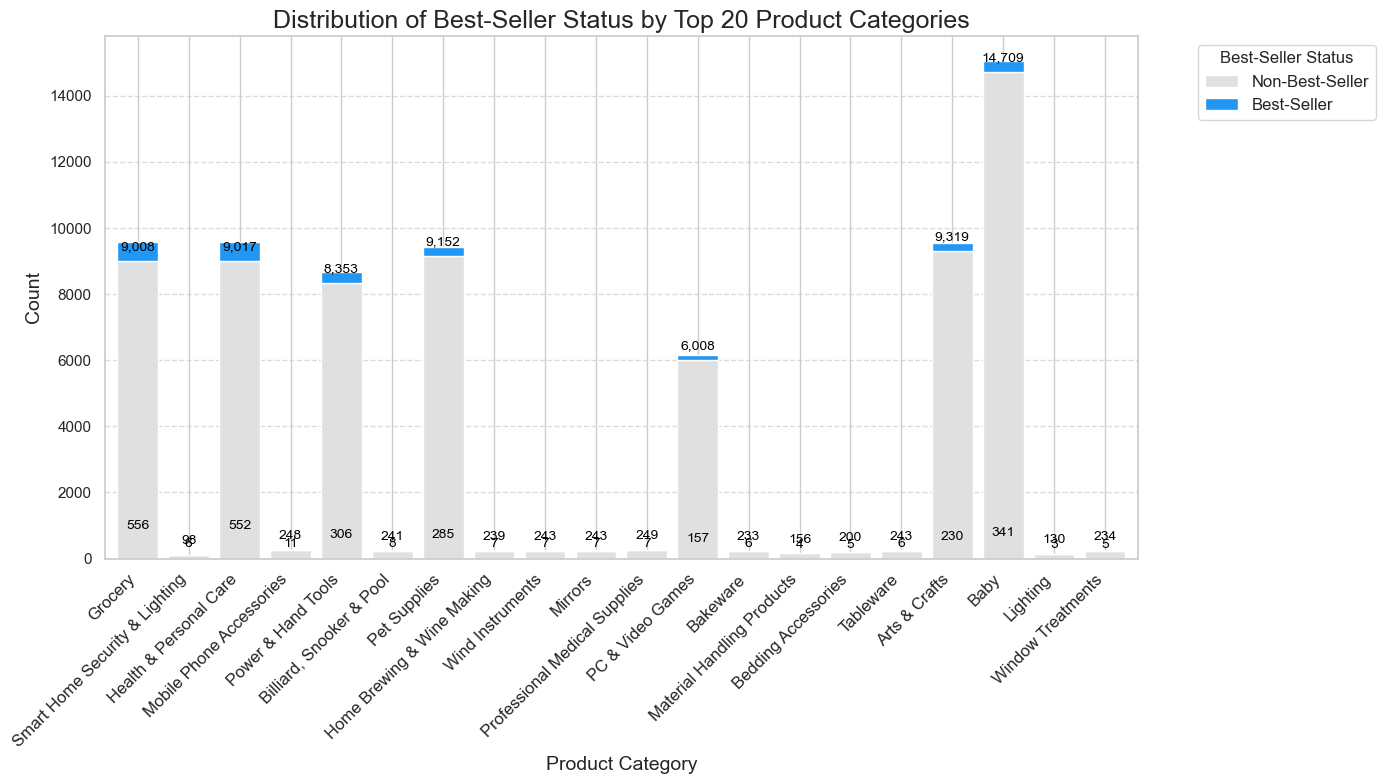

In [59]:
# Plot the stacked bar chart for the top 20 categories
plt.figure(figsize=(14, 8))  # Set the size of the figure

# Plot the stacked bar chart for the top 20 categories with customized colors
top_20_categories.drop(columns='Proportion_BestSeller').plot(kind='bar', stacked=True, figsize=(14, 8), color=['#e0e0e0', '#2196F3'], width=0.8, ax=plt.gca())

# Set labels and title with larger font sizes
plt.title('Distribution of Best-Seller Status by Top 20 Product Categories', fontsize=18)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate the x-axis labels slightly for better readability and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the legend outside the plot to avoid overlapping
plt.legend(title='Best-Seller Status', labels=['Non-Best-Seller', 'Best-Seller'], fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally: Annotate the bars with the values (counts)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Challenge II

C:\Users\graci\AppData\Local\Temp\ipykernel_796\2354752449.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', palette='Set2')


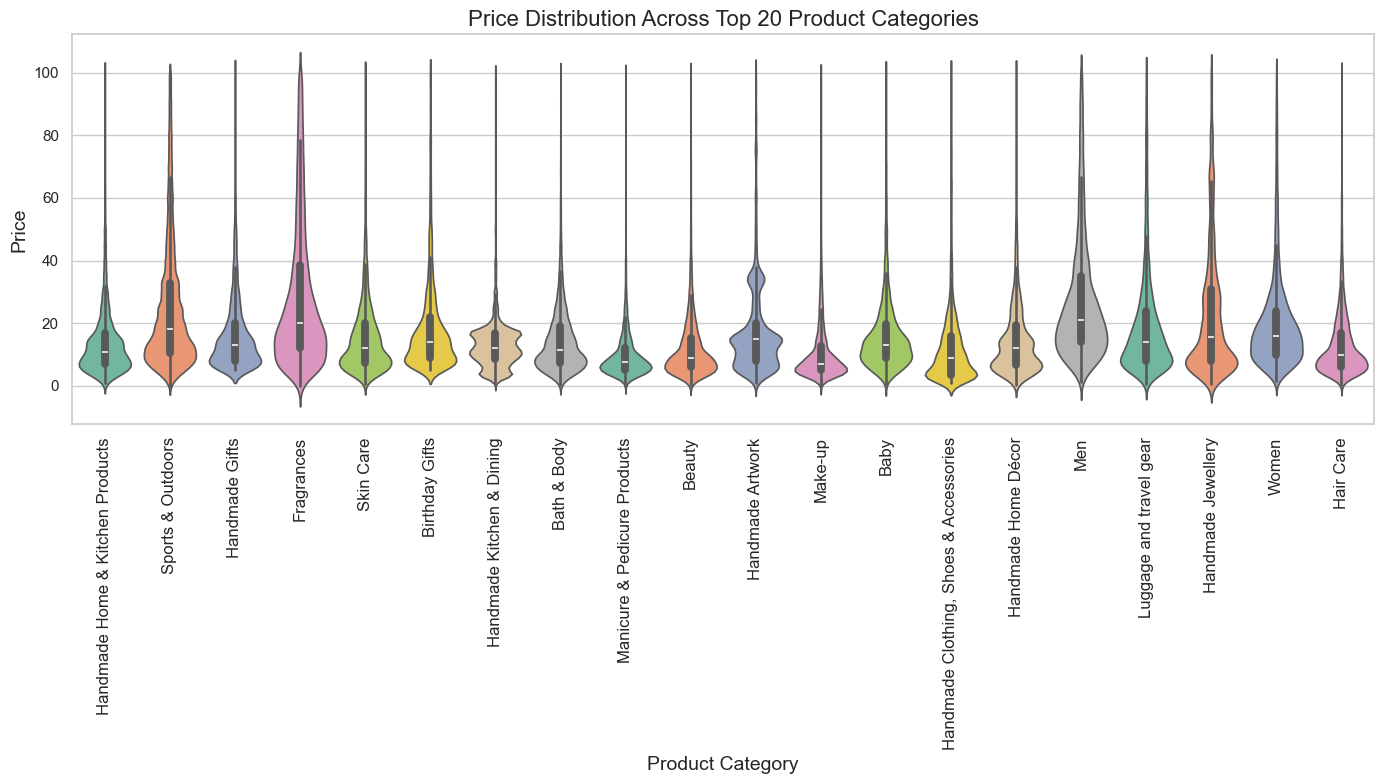

C:\Users\graci\AppData\Local\Temp\ipykernel_796\2354752449.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x='category', y='price', palette='Set2')


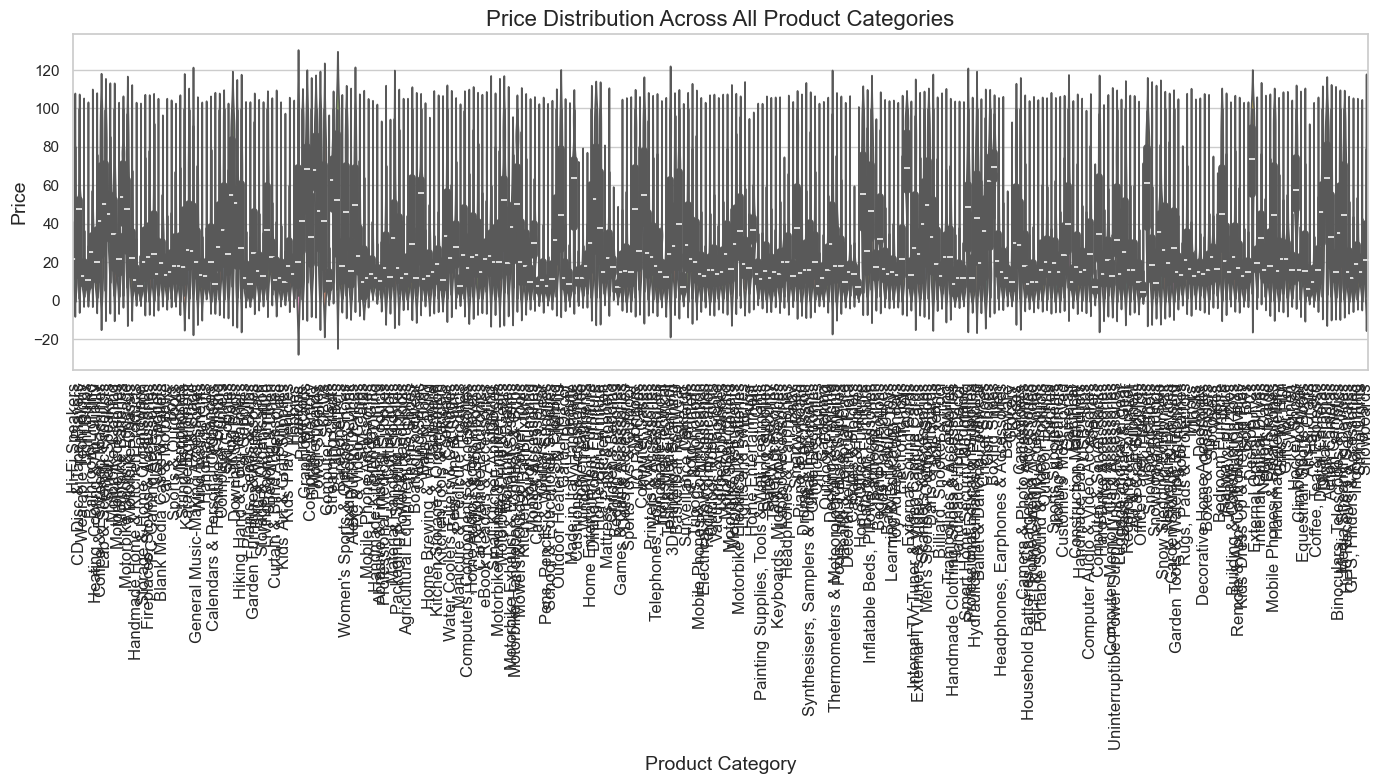

The product category with the highest median price is 'Desktop PCs' with a median price of 74.00.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Remove outliers in product prices using IQR method

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for product prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Step 2: Violin Plot for Price Distribution by Category

# Get the count of products by category and filter for top 20 categories
category_counts = df_cleaned['category'].value_counts()
top_20_categories = category_counts.head(20).index

# Filter the dataframe to include only the top 20 categories
df_top_20 = df_cleaned[df_cleaned['category'].isin(top_20_categories)]

# Create a violin plot for product price distribution across top 20 categories
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_20, x='category', y='price', palette='Set2')
plt.title('Price Distribution Across Top 20 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

# Step 3: Violin Plot for All Categories (without filtering for top 20)

# Create a violin plot for product price distribution across all categories
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_cleaned, x='category', y='price', palette='Set2')
plt.title('Price Distribution Across All Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

# Step 4: Identifying the category with the highest median price
# We can calculate the median price per category and find the category with the highest median.
category_medians = df_cleaned.groupby('category')['price'].median()
highest_median_category = category_medians.idxmax()
highest_median_price = category_medians.max()

print(f"The product category with the highest median price is '{highest_median_category}' with a median price of {highest_median_price:.2f}.")


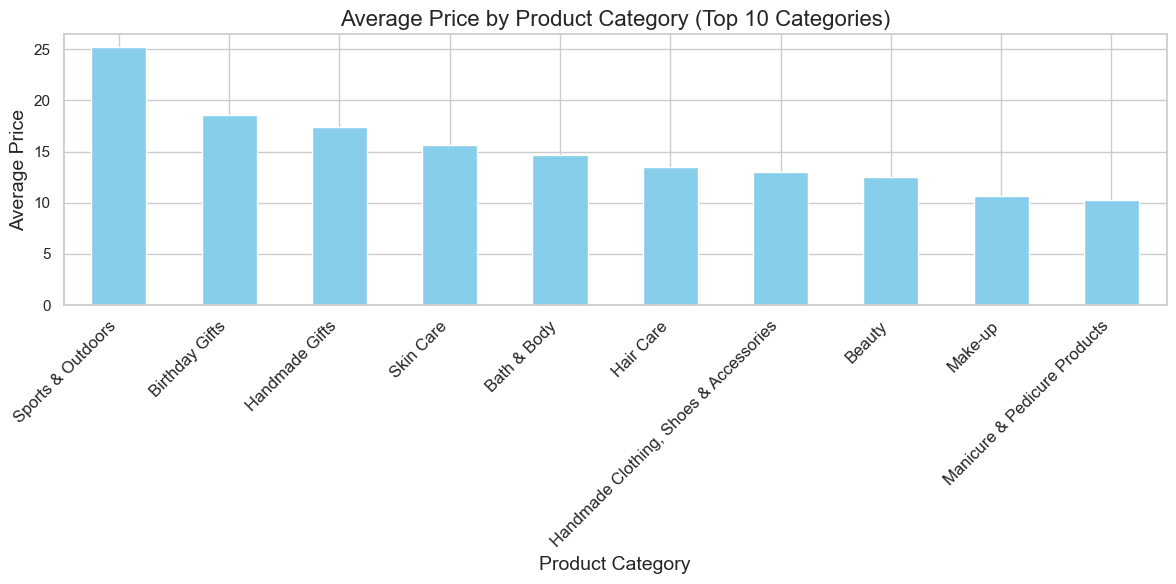

The product category with the highest average price is 'Sports & Outdoors' with an average price of 25.17.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtering the top 10 product categories by count
category_counts = df_cleaned['category'].value_counts()

# Selecting the top 10 categories
top_10_categories = category_counts.head(10).index

#the average price for each of the top 10 categories
average_price_by_category = df_cleaned[df_cleaned['category'].isin(top_10_categories)] \
                            .groupby('category')['price'] \
                            .mean() \
                            .sort_values(ascending=False)

#Creating a bar chart comparing the average price of products
plt.figure(figsize=(12, 6))
average_price_by_category.plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Average Price by Product Category (Top 10 Categories)', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

#Identifying the product category with the highest average price
highest_avg_price_category = average_price_by_category.idxmax()
highest_avg_price = average_price_by_category.max()

print(f"The product category with the highest average price is '{highest_avg_price_category}' with an average price of {highest_avg_price:.2f}.")


C:\Users\graci\AppData\Local\Temp\ipykernel_796\330808754.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned[df_cleaned['category'].isin(top_10_categories)],


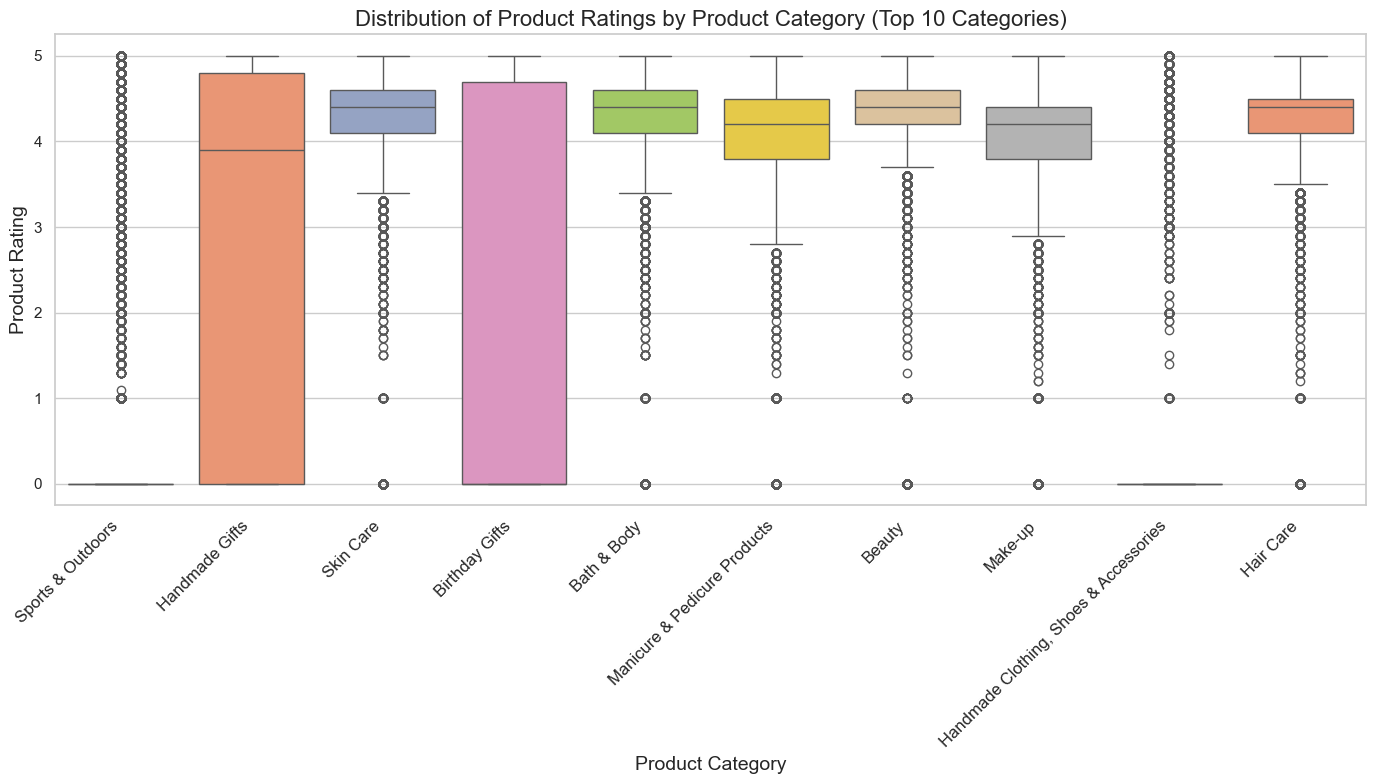

The product category with the highest median rating is 'Computer Memory' with a median rating of 4.70.


In [66]:
# Step 1: Filter the top 10 product categories by count
category_counts = df_cleaned['category'].value_counts()

# Select the top 10 categories based on count
top_10_categories = category_counts.head(10).index

# Creating a box plot for product ratings based on category (filtered for top 10 categories)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned[df_cleaned['category'].isin(top_10_categories)],
            x='category', y='stars', palette='Set2')

# Set labels and title
plt.title('Distribution of Product Ratings by Product Category (Top 10 Categories)', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Product Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Calculating the median rating for each category (without filtering by top categories)
median_ratings_by_category = df_cleaned.groupby('category')['stars'].median()

# Identifying the category with the highest median rating
highest_median_rating_category = median_ratings_by_category.idxmax()
highest_median_rating = median_ratings_by_category.max()

print(f"The product category with the highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating:.2f}.")


Correlation coefficient between price and stars: -0.0777


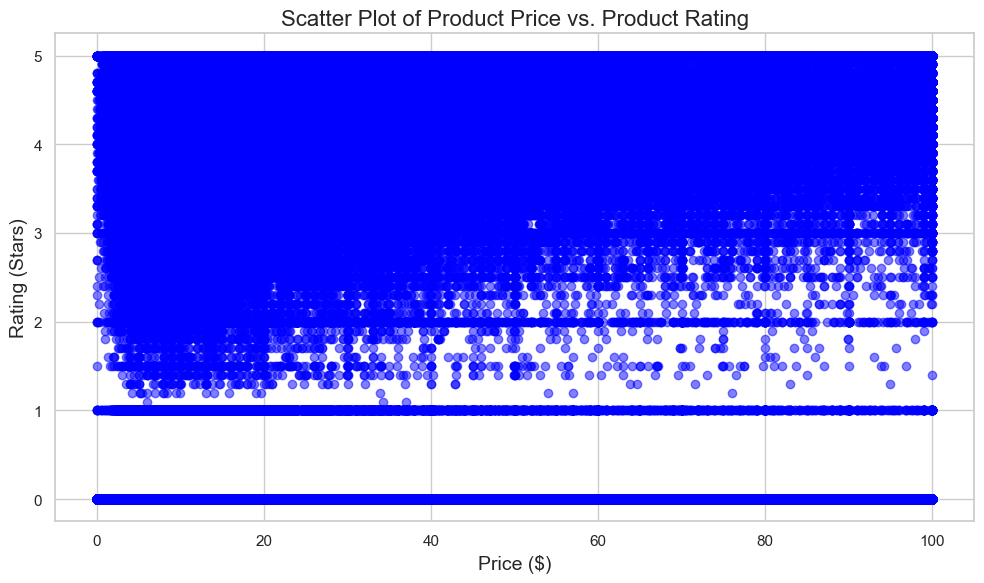

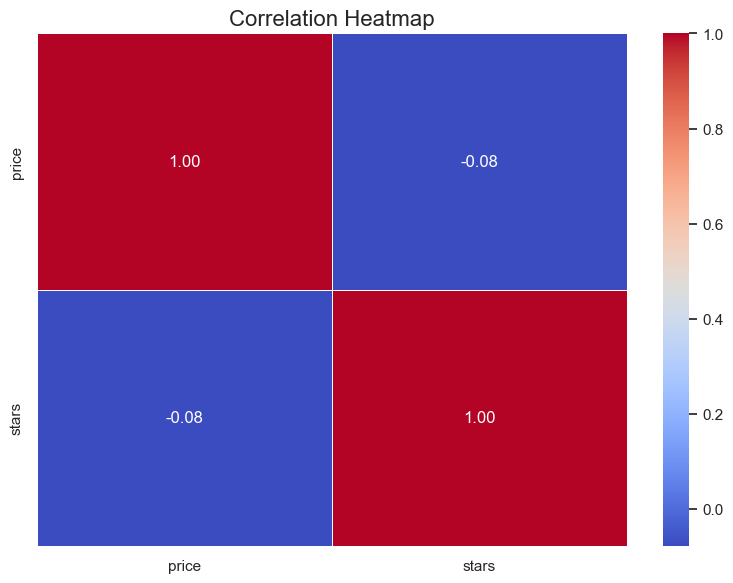

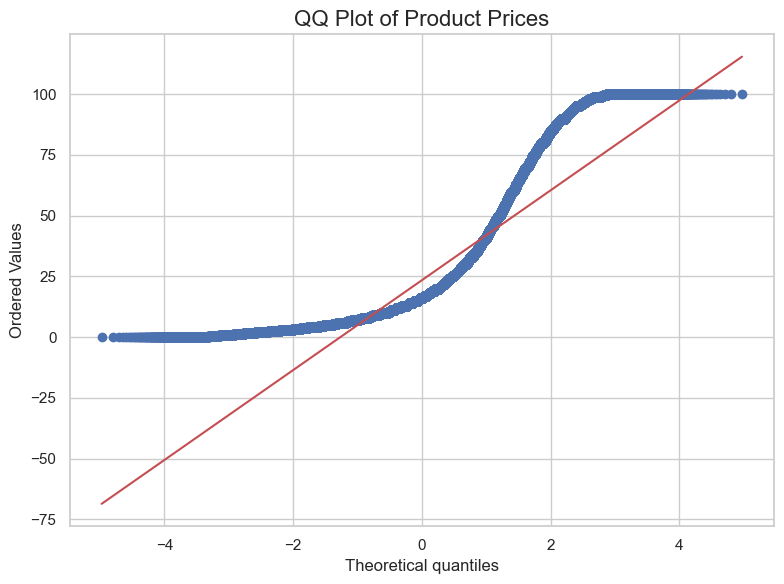

In [68]:
import scipy.stats as stats

# Calculate the correlation coefficient between price and stars (ratings)
correlation = df_cleaned['price'].corr(df_cleaned['stars'])
print(f"Correlation coefficient between price and stars: {correlation:.4f}")

# Scatter plot of price vs. stars
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['price'], df_cleaned['stars'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Product Price vs. Product Rating', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Rating (Stars)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation heatmap for all numerical variables
# We'll select numerical columns (price and stars) for this analysis
numerical_data = df_cleaned[['price', 'stars']]

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

#QQ Plot to check the normality of product prices
plt.figure(figsize=(8, 6))
stats.probplot(df_cleaned['price'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices', fontsize=16)
plt.tight_layout()
plt.show()
